In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.pyplot import MultipleLocator

In [2]:
def uniform_sample(data_array,num,binsnum):#every bins sample the same num
    d=np.ptp(data_array)/binsnum
    datamin=np.amin(data_array)
    data_bins=[]
    for ii in range(0,binsnum):
        data_bins.append(data_array[(data_array>=d*ii+datamin)&(data_array<=d*(ii+1)+datamin)])
    datasample=[]
    for jj in range(0,binsnum):
        datasample.append(np.random.choice(list(data_bins[jj]),num))
    return np.array(datasample).ravel()

In [3]:
hdu1=fits.open('/Users/zjq/Downloads/master_DLA.fits')
hdu2=fits.open('/Users/zjq/Downloads/master.fits')
hdu1.info()
hdu2.info()



Filename: /Users/zjq/Downloads/master_DLA.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  DLACAT        1 BinTableHDU     30   2215472R x 10C   [D, D, D, D, D, D, D, K, K, K]   
Filename: /Users/zjq/Downloads/master.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  CATALOG       1 BinTableHDU     24   3618494R x 7C   [D, D, D, D, K, K, K]   
  2  COSMO_COL     1 BinTableHDU     18   2048R x 4C   [D, D, D, D]   
  3  COSMO_EXP     1 BinTableHDU     18   5637R x 4C   [E, E, E, E]   


In [4]:
nhi=hdu1[1].data['N_HI_DLA']
#zcut
nhicut=(nhi>=20.3)&(nhi<=21.5)
nhi_dla=nhi[nhicut]


Text(0.5, 1.0, 'HIST of DLA NHI')

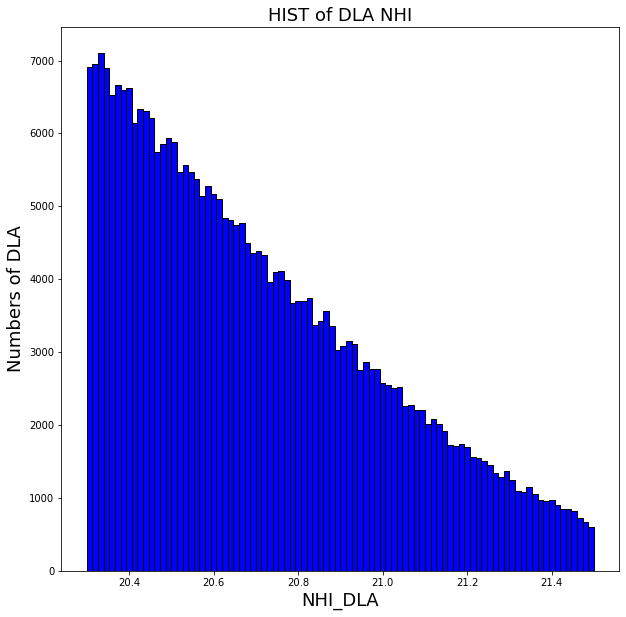

In [5]:
plt.figure(figsize=(10,10))
plt.hist(nhi_dla, bins='auto',color='blue',edgecolor='black')
plt.xlabel('NHI_DLA',fontsize=18)
plt.ylabel('Numbers of DLA',fontsize=18)
plt.title('HIST of DLA NHI',fontsize=18)



Text(0.5, 1.0, 'HIST of DLA NHI Sample')

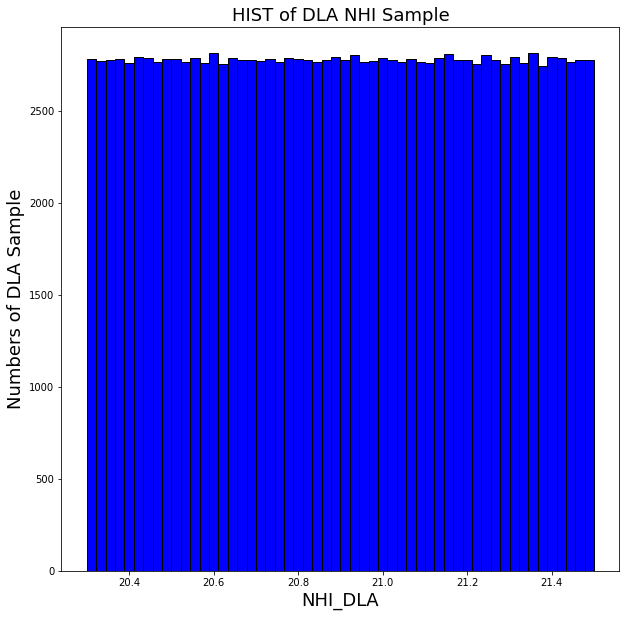

In [6]:
nhisample=uniform_sample(nhi_dla,300,500)
plt.figure(figsize=(10,10))
plt.hist(nhisample,bins='auto',color='blue',edgecolor='black')
plt.xlabel('NHI_DLA',fontsize=18)
plt.ylabel('Numbers of DLA Sample',fontsize=18)
plt.title('HIST of DLA NHI Sample',fontsize=18)

